In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import cv2

from datetime import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  roc_auc_score
import time
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [2]:
folders=os.listdir( '245_data')
print(folders)

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '[', ']', '{', '}']


In [3]:
numeric_data=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alphabet_data=['A', 'b','C','d', 'e', 'f', 'G', 'H', 'i', 'j', 'k', 'l', 'M','N','o', 'p','q', 'R','S','T', 'u', 'v', 'w', 'X', 'y', 'z']
symbol_data=['!', '(', ')', '+', ',', '-','=','alpha', 'ascii_124', 'beta', 'cos', 'Delta', 'div','exists', 'forall', 'forward_slash','gamma', 'geq', 'gt', 'in', 'infty', 'int','lambda', 'ldots', 'leq', 'lim', 'log', 'lt','mu', 'neq', 'phi', 'pi', 'pm', 'prime', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', '[', ']', '{', '}']

In [6]:
data = []
label = []

for each in folders:
    file_ct=0
    currentFolder = 'C:/Users/Yunao/Downloads/245_data/' + each
    for i, file in enumerate(os.listdir(currentFolder)):
        if file_ct > 1000:
                break
        im= cv2.imread((os.path.join(currentFolder, file)))
        img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        #resize
        resized_image = cv2.resize(img, (16,16))
        #normalization
        img = np.array(resized_image)/255
        
        img = img.ravel()
        img = img.tolist()
        
        data.append(img)
        label.append(each)
            
        file_ct+=1
        
df = pd.DataFrame(data)
df["label"] = label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.403922,1.000000,1.0,...,0.415686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,!
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.403922,1.0,...,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,!
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.403922,1.000000,1.0,...,0.415686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,!
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.403922,1.0,...,0.588235,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,!
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.592157,1.0,...,0.592157,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,!


In [7]:
df.shape

(67640, 257)

Text(0.5, 1.0, 'Label Distribution')

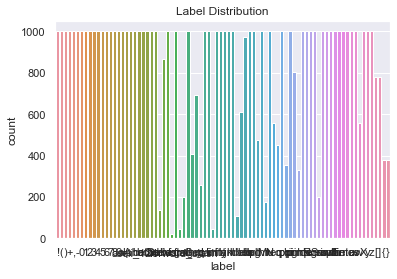

In [8]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data=df)
plt.title('Label Distribution')

In [9]:
df1=df

data=df1.iloc[:,:-1]
label=df1.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(label)

#60% train, 20% test, 20% validation
X_train, X_test, y_train, y_test = train_test_split(data, label_encoded, test_size=0.2, random_state=22, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=22)

In [10]:
print('Training dataset contains: ', X_train.shape, ' data')
print('Testing dataset contains: ', X_test.shape, ' data')
print('Validation dataset contains: ', X_val.shape, ' data')

Training dataset contains:  (40584, 256)  data
Testing dataset contains:  (13528, 256)  data
Validation dataset contains:  (13528, 256)  data


In [11]:
evaluation_col = ["Model","training duration(ms)", "predicting duration(ms)", "accuracy score"]
performance_result=[]

0.12004824400157932


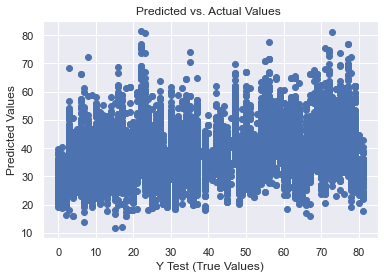

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values ')

r2 = lr_model.score(X_test,y_test)
print(r2)

In [16]:
 from sklearn.neighbors import KNeighborsClassifier
    
train_start = time.time()
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = KNN_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['KNN',traing_time,predict_time,accuracy])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.92      0.44       208
           1       0.30      0.78      0.43       213
           2       0.36      0.77      0.49       211
           3       0.17      0.24      0.20       201
           4       0.13      0.48      0.21       214
           5       0.33      0.65      0.44       194
           6       0.55      0.17      0.26       209
           7       0.25      0.46      0.33       197
           8       0.31      0.10      0.15       184
           9       0.42      0.17      0.25       190
          10       0.33      0.09      0.14       194
          11       0.58      0.21      0.31       214
          12       0.75      0.25      0.37       210
          13       0.49      0.26      0.34       186
          14       1.00      0.11      0.20       188
          15       0.52      0.26      0.35       190
          16       0.18      0.77      0.29       191
          17       0.83    

In [14]:
from sklearn import svm

train_start = time.time()
svm_classifier = svm.SVC(kernel='rbf',gamma=0.001,C=5)
svm_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = svm_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['SVM',traing_time,predict_time,accuracy])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.70      0.46       208
           1       0.47      0.72      0.57       213
           2       0.46      0.79      0.58       211
           3       0.33      0.32      0.33       201
           4       0.27      0.53      0.35       214
           5       0.40      0.96      0.56       194
           6       0.51      0.60      0.56       209
           7       0.39      0.56      0.46       197
           8       0.30      0.34      0.32       184
           9       0.48      0.49      0.49       190
          10       0.33      0.35      0.34       194
          11       0.43      0.43      0.43       214
          12       0.57      0.54      0.56       210
          13       0.52      0.54      0.53       186
          14       0.61      0.46      0.53       188
          15       0.36      0.49      0.42       190
          16       0.39      0.66      0.49       191
          17       0.44    

C:\Users\Yunao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.naive_bayes import GaussianNB
    
train_start = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = nb_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['NB',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.07      0.12       208
           1       0.29      0.22      0.25       213
           2       0.49      0.16      0.24       211
           3       0.34      0.05      0.09       201
           4       0.39      0.07      0.13       214
           5       0.59      0.20      0.29       194
           6       0.38      0.11      0.18       209
           7       0.33      0.03      0.06       197
           8       0.40      0.01      0.02       184
           9       0.64      0.16      0.25       190
          10       0.19      0.05      0.07       194
          11       0.55      0.10      0.17       214
          12       0.16      0.33      0.21       210
          13       0.68      0.14      0.23       186
          14       0.12      0.11      0.11       188
          15       0.34      0.27      0.30       190
          16       1.00      0.01      0.01       191
          17       0.46    

In [18]:
from sklearn.tree import DecisionTreeClassifier
    
train_start = time.time()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = dt_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['DT',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       208
           1       0.69      0.62      0.66       213
           2       0.78      0.65      0.71       211
           3       0.48      0.31      0.38       201
           4       0.65      0.66      0.65       214
           5       0.69      0.85      0.76       194
           6       0.65      0.44      0.53       209
           7       0.48      0.43      0.46       197
           8       0.39      0.25      0.30       184
           9       0.57      0.51      0.54       190
          10       0.59      0.47      0.53       194
          11       0.56      0.42      0.48       214
          12       0.68      0.57      0.62       210
          13       0.59      0.52      0.55       186
          14       0.64      0.52      0.57       188
          15       0.56      0.55      0.56       190
          16       0.70      0.59      0.64       191
          17       0.56    

In [19]:
from sklearn.ensemble import RandomForestClassifier
    
train_start = time.time()
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = RF_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['RF',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04       208
           1       0.34      0.16      0.22       213
           2       0.20      0.67      0.31       211
           3       0.00      0.00      0.00       201
           4       0.19      0.07      0.10       214
           5       0.36      0.45      0.40       194
           6       0.42      0.10      0.16       209
           7       0.11      0.45      0.18       197
           8       1.00      0.01      0.01       184
           9       0.20      0.61      0.30       190
          10       0.00      0.00      0.00       194
          11       0.64      0.03      0.06       214
          12       0.22      0.08      0.12       210
          13       0.25      0.01      0.01       186
          14       0.11      0.51      0.18       188
          15       0.23      0.13      0.16       190
          16       0.65      0.07      0.12       191
          17       0.34    

C:\Users\Yunao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.linear_model import SGDClassifier
    
train_start = time.time()
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_classifier.fit(X_train, y_train)
traing_time = (time.time() - train_start)
    
predict_start= time.time()
y_pred = sgd_classifier.predict(X_test)
predict_time = (time.time() - predict_start)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['GD',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.87      0.18      0.30       213
           2       0.84      0.25      0.38       211
           3       1.00      0.00      0.01       201
           4       0.00      0.00      0.00       214
           5       0.37      0.58      0.45       194
           6       0.50      0.50      0.50       209
           7       0.00      0.00      0.00       197
           8       1.00      0.01      0.01       184
           9       0.08      0.92      0.14       190
          10       0.48      0.07      0.12       194
          11       0.00      0.00      0.00       214
          12       0.91      0.05      0.09       210
          13       0.84      0.09      0.16       186
          14       0.30      0.49      0.37       188
          15       1.00      0.02      0.04       190
          16       0.43      0.29      0.34       191
          17       0.74    

C:\Users\Yunao\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Yunao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
eva_df = pd.DataFrame(performance_result, columns =evaluation_col)
eva_df = eva_df.round(2)
eva_df

,Model,training duration(ms),predicting duration(ms),accuracy score
0,KNN,13945.00,303088.00,44.63
1,SVM,886617.00,247318.00,51.63
2,KNN,14.02,372.07,44.63
3,NB,0.43,5.50,28.97
4,DT,5.54,0.04,76.35
5,RF,2.47,1.81,19.83
6,GD,10.39,0.06,26.92
7,ensemble1,823850.00,654388.00,63.97


In [22]:
train_start = time.time()
eclf1 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf1.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble1',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.30      0.95      0.46       208
           1       0.33      0.83      0.47       213
           2       0.38      0.85      0.52       211
           3       0.25      0.43      0.32       201
           4       0.20      0.63      0.30       214
           5       0.45      0.96      0.61       194
           6       0.57      0.66      0.61       209
           7       0.33      0.59      0.42       197
           8       0.37      0.33      0.35       184
           9       0.45      0.53      0.48       190
          10       0.44      0.36      0.40       194
          11       0.53      0.56      0.54       214
          12       0.69      0.57      0.62       210
          13       0.56      0.48      0.51       186
          14       0.64      0.51      0.57       188
          15       0.48      0.48      0.48       190
          16       0.27      0.76      0.40       191
          17       0.55    

In [ ]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf2 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf2.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble2',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

In [ ]:
train_start = time.time()
eclf3 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[1,1,2],flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf3.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble3',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

In [ ]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf4 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[1,2,1],flatten_transform=True)
eclf4 = eclf4.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf4.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble4',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

In [ ]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf5 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[2,1,1],flatten_transform=True)
eclf5 = eclf5.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf5.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble5',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))